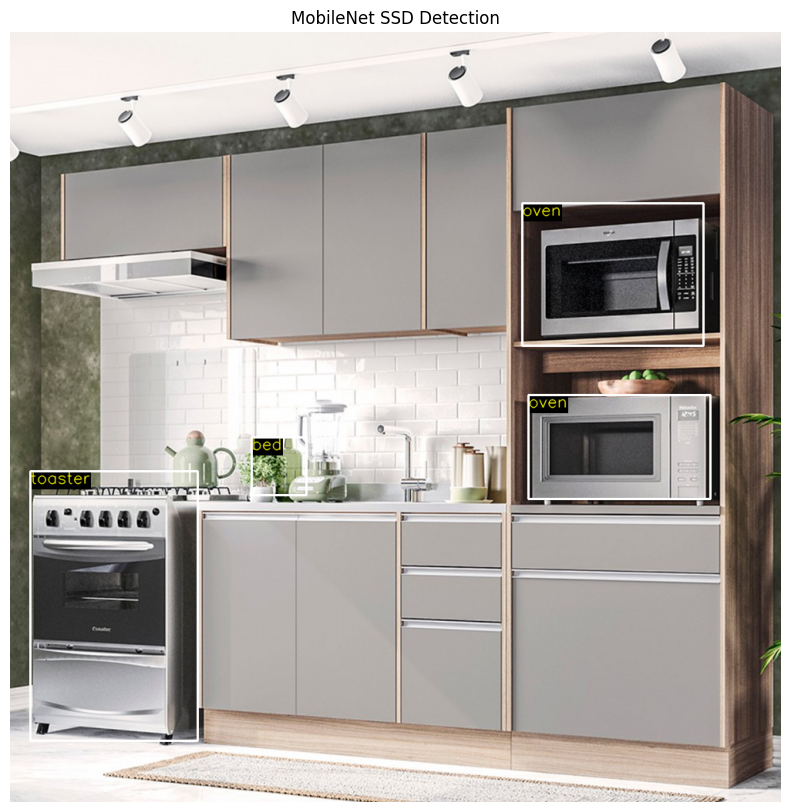

Tempo de execução: 28.07 ms
Objeto detectado: oven - Confiança: 0.98
Objeto detectado: oven - Confiança: 0.83
Objeto detectado: toaster - Confiança: 0.78
Objeto detectado: bed - Confiança: 0.75


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

# Caminhos dos arquivos
modelFile = "resources/ssd_mobilenet_frozen_inference_graph.pb"
configFile = "resources/ssd_mobilenet_v2_coco_2018_03_29.pbtxt"
classFile = "resources/object_detection_classes_coco.txt"
imagePath = "images/cozinha.jpg"

# Carregar labels
with open(classFile) as f:
    labels = f.read().strip().split('\n')

# Carregar rede
net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)

# Função para detecção
def detect_objects(net, img):
    if img is None:
        print(f"Erro: não foi possível carregar a imagem em {imagePath}")
        sys.exit(1)
    blob = cv2.dnn.blobFromImage(img, 1.0, (300, 300), (0, 0, 0), True)
    net.setInput(blob)
    return net.forward()

# Função para desenhar texto
def draw_text(im, text, x, y):
    fontface = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.7
    thickness = 1
    textSize = cv2.getTextSize(text, fontface, font_scale, thickness)[0]
    baseline = cv2.getTextSize(text, fontface, font_scale, thickness)[1]
    cv2.rectangle(im, (x, y), (x + textSize[0], y + textSize[1] + baseline), (0, 0, 0), cv2.FILLED)
    cv2.putText(im, text, (x, y + textSize[1]), fontface, font_scale, (0, 255, 255), thickness, cv2.LINE_AA)

# Função para desenhar objetos com threshold
def draw_objects(im, objects, threshold=0.4):
    rows, cols = im.shape[:2]
    for i in range(objects.shape[2]):
        classId = int(objects[0, 0, i, 1])
        score = float(objects[0, 0, i, 2])
        x = int(objects[0, 0, i, 3] * cols)
        y = int(objects[0, 0, i, 4] * rows)
        w = int(objects[0, 0, i, 5] * cols - x)
        h = int(objects[0, 0, i, 6] * rows - y)
        if score > threshold:
            draw_text(im, "{}".format(labels[classId]), x, y)
            cv2.rectangle(im, (x, y), (x + w, y + h), (255, 255, 255), 2)
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# Carregar imagem e detectar
image = cv2.imread(imagePath)
detections = detect_objects(net, image)

# Desenhar resultados e mostrar
output = draw_objects(image.copy(), detections, 0.4)
plt.figure(figsize=(14, 10))
plt.imshow(output)
plt.axis("off")
plt.title("MobileNet SSD Detection")
plt.show()

# Medir tempo de execução
start = cv2.getTickCount()
detections = detect_objects(net, image)
end = cv2.getTickCount()
execution_time_ms = (end - start) * 1000 / cv2.getTickFrequency()

print(f"Tempo de execução: {execution_time_ms:.2f} ms")

# Listar objetos detectados
for i in range(detections.shape[2]):
    confidence = float(detections[0, 0, i, 2])
    if confidence > 0.4:
        class_id = int(detections[0, 0, i, 1])
        label = labels[class_id]
        print(f"Objeto detectado: {label} - Confiança: {confidence:.2f}")